<a href="https://colab.research.google.com/github/priyadarshinivr19/Minors-Degree-Machine-Learning/blob/main/Probability_and_Statistics_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.graph_objects as pg
import plotly.express as px

# **Probability**

In [ ]:
def draw_cards(number_of_draws=100):
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']
    deck = [f'{rank} of {suit}' for suit in suits for rank in ranks]
    return pd.Series(np.random.choice(deck, number_of_draws))

# Draw cards
results = draw_cards()
print(results.value_counts())

# Visualize the distribution of drawn cards
fig = pg.Figure([pg.Bar(x=results.value_counts().index,
                        y=results.value_counts().values)])
fig.update_layout(xaxis_title="Card", yaxis_title="Frequency", title="Card Draw Distribution")
fig.show()


4 of Hearts          6
Jack of Hearts       5
4 of Spades          4
10 of Hearts         4
5 of Hearts          4
6 of Hearts          4
3 of Diamonds        3
7 of Diamonds        3
2 of Spades          3
8 of Spades          3
6 of Spades          3
9 of Clubs           3
9 of Diamonds        3
3 of Clubs           3
5 of Diamonds        3
9 of Spades          2
2 of Clubs           2
Queen of Clubs       2
Queen of Diamonds    2
King of Spades       2
Jack of Spades       2
Ace of Spades        2
6 of Diamonds        2
Jack of Clubs        2
Queen of Spades      2
8 of Hearts          2
4 of Diamonds        2
3 of Spades          2
Ace of Hearts        2
8 of Diamonds        2
Ace of Clubs         1
4 of Clubs           1
5 of Spades          1
2 of Hearts          1
3 of Hearts          1
7 of Hearts          1
Ace of Diamonds      1
5 of Clubs           1
6 of Clubs           1
8 of Clubs           1
King of Diamonds     1
10 of Clubs          1
King of Clubs        1
7 of Clubs 

Derived Probability Distribution

In [ ]:
def count_aces(draws):
    return np.sum(draws.str.contains('Ace'))

# Simulate drawing 5 cards 10000 times and count the number of Aces in each draw
results = pd.Series([count_aces(draw_cards()) for _ in range(10000)])

# Visualize the derived probability distribution
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.update_layout(xaxis_title="Number of Aces", yaxis_title="Frequency", title="Probability Distribution of Number of Aces in 5 Draws")
fig.show()

Sampling

In [ ]:
def draw_ranks(number_of_draws=10):
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']
    deck = ranks * 4  # 4 suits, so each rank appears 4 times
    return pd.Series(np.random.choice(deck, number_of_draws, replace=True))

# Simulate drawing cards with varying number of draws
results = {draws: draw_ranks(draws) for draws in [10, 100, 1000, 10000, 1000000]}

# Create the plot with bars for each number of draws
fig = pg.Figure([pg.Bar(
    x=result.value_counts().keys(),
    y=result.value_counts().values / draws,
    name=f'{draws} Draws'
) for draws, result in results.items()])

# Add a reference line for the uniform distribution (1/13 for each rank)
fig.add_shape(type='line', x0=-0.5, y0=1/13, x1=12.5, y1=1/13, line=dict(color='Red', dash='dash'))

# Update layout with titles and labels
fig.update_layout(
    xaxis_title="Card Rank",
    yaxis_title="Normalized Frequency",
    title="Probability Distribution of Card Ranks for Varying Number of Draws",
    barmode='overlay',  # Overlay bars for comparison
)

fig.show()

# **Expectation**

In [ ]:

def simulate_draws(num_simulations=100000):
    non_ace_counts = []
    for _ in range(num_simulations):
        # Create a deck with 48 non-Aces and 4 Aces
        deck = ['Non-Ace'] * 48 + ['Ace'] * 4
        np.random.shuffle(deck)

        # Draw cards one by one until an Ace is drawn
        non_ace_count = 0
        for card in deck:
            if card == 'Ace':
                break
            non_ace_count += 1

        non_ace_counts.append(non_ace_count)

    return np.mean(non_ace_counts)

# Run the simulation
expected_non_aces = simulate_draws()
print(f"Expected number of non-Ace cards thrown out: {expected_non_aces:.2f}")


Expected number of non-Ace cards thrown out: 9.62


# **Measurements and Errors**

Mean Squared Error

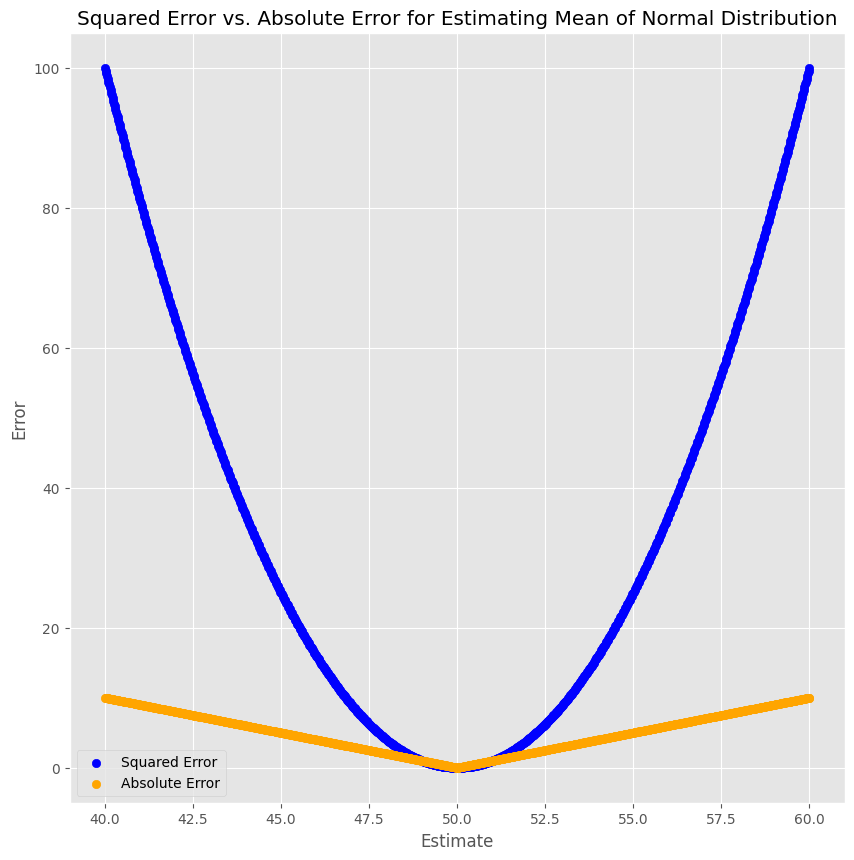

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Setup the plot style and size
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))

# Generate estimates around the true mean (50)
estimates = np.linspace(40, 60, 1000)

# Calculate squared error and absolute error from the true mean (50)
squared_error = (estimates - 50) ** 2
absolute_error = abs(estimates - 50)

# Plot the squared error and absolute error
plt.scatter(estimates, squared_error, label='Squared Error', color='blue')
plt.scatter(estimates, absolute_error, label='Absolute Error', color='orange')

# Add labels and legend
plt.xlabel('Estimate')
plt.ylabel('Error')
plt.title('Squared Error vs. Absolute Error for Estimating Mean of Normal Distribution')
plt.legend()

# Display the plot
plt.show()


Standardization

In [ ]:
# Create a synthetic dataset with student grades in various subjects
np.random.seed(42)  # For reproducibility
data = {
    "Math": np.random.randint(50, 100, 100),
    "Science": np.random.randint(45, 95, 100),
    "English": np.random.randint(55, 100, 100),
    "History": np.random.randint(60, 90, 100),
    "Art": np.random.randint(65, 100, 100),
}

# Convert the data into a DataFrame
grades = pd.DataFrame(data)

# Print the shape of the DataFrame
print(grades.shape)

# Perform aggregation: mean, variance, and standard deviation
agg_results = grades.agg(["mean", "var", "std"])

# Display the aggregation results
print(agg_results)

(100, 5)
            Math     Science     English    History         Art
mean   74.070000   69.450000   75.780000  74.290000   83.010000
var   208.732424  198.209596  165.163232  88.975657  109.262525
std    14.447575   14.078693   12.851585   9.432691   10.452872


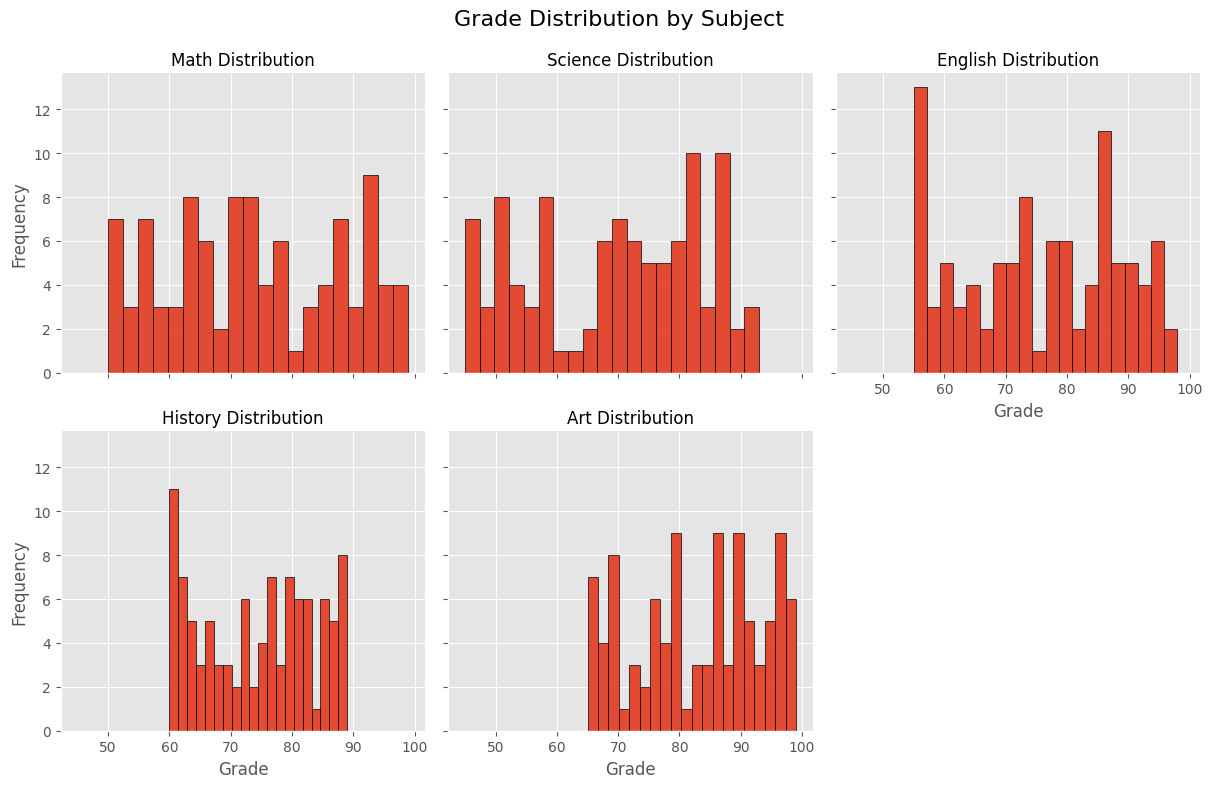

In [ ]:
grades = pd.DataFrame(data)
grades['Name'] = range(1, len(grades) + 1)  # Add a unique identifier for each student

# Melt the DataFrame for easier plotting with seaborn
melted_grades = grades.melt(id_vars="Name", var_name="Subject", value_name="Grade")

# Create a FacetGrid with histograms
g = sns.FacetGrid(melted_grades, col="Subject", col_wrap=3, height=4)
g.map(plt.hist, "Grade", bins=20, edgecolor='black')

# Adjust layout and add titles
g.set_titles("{col_name} Distribution")
g.set_axis_labels("Grade", "Frequency")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Grade Distribution by Subject", fontsize=16)

# Show the plot
plt.show()

In [ ]:
grades.head()

,Math,Science,English,History,Art,Name
0,88,53,69,81,93,1
1,78,68,86,62,90,2
2,64,45,86,75,99,3
3,92,88,78,88,89,4
4,57,52,95,68,88,5


# **Mathematics of Probability**

Binomial Distibution

In [16]:
from scipy.stats import binom

# Probability of getting exactly 5 successes in 5 trials with p = 0.25
prob_exact_5_successes = binom.pmf(k=5, n=5, p=0.25)

# 1 - (Probability of getting exactly 4 successes + Probability of getting exactly 5 successes) with p = 0.75
prob_4_successes = binom.pmf(k=4, n=5, p=0.75)
prob_5_successes = binom.pmf(k=5, n=5, p=0.75)
prob_complement = 1 - (prob_4_successes + prob_5_successes)

# Cumulative probability of getting 3 or fewer successes in 5 trials with p = 0.75
prob_cdf_3_or_fewer = binom.cdf(3, n=5, p=0.75)

print(f"Probability of getting exactly 5 successes in 5 trials with p = 0.25: {prob_exact_5_successes:.4f}")
print(f"1 - (Probability of getting exactly 4 successes + Probability of getting exactly 5 successes) with p = 0.75: {prob_complement:.4f}")
print(f"Cumulative probability of getting 3 or fewer successes in 5 trials with p = 0.75: {prob_cdf_3_or_fewer:.4f}")


Probability of getting exactly 5 successes in 5 trials with p = 0.25: 0.0010
1 - (Probability of getting exactly 4 successes + Probability of getting exactly 5 successes) with p = 0.75: 0.3672
Cumulative probability of getting 3 or fewer successes in 5 trials with p = 0.75: 0.3672


Normal Distribution

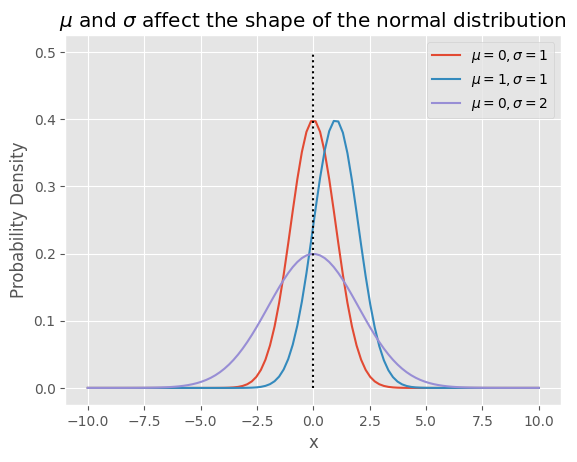

In [17]:

from scipy.stats import norm

# Define the range of x values
x = np.linspace(-10, 10, 100)

# Calculate the PDF for different normal distributions
f1 = norm.pdf(x, loc=0, scale=1)
f2 = norm.pdf(x, loc=1, scale=1)
f3 = norm.pdf(x, loc=0, scale=2)

# Plot the PDFs
plt.plot(x, f1, label="$\mu=0, \sigma=1$")
plt.plot(x, f2, label="$\mu=1, \sigma=1$")
plt.plot(x, f3, label="$\mu=0, \sigma=2$")
plt.vlines(x=0, ymin=0, ymax=0.5, linestyles="dotted", color='black')

# Add labels, title, and legend
plt.legend()
plt.title("$\mu$ and $\sigma$ affect the shape of the normal distribution")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.grid(True)
plt.show()


Poisson Distribution

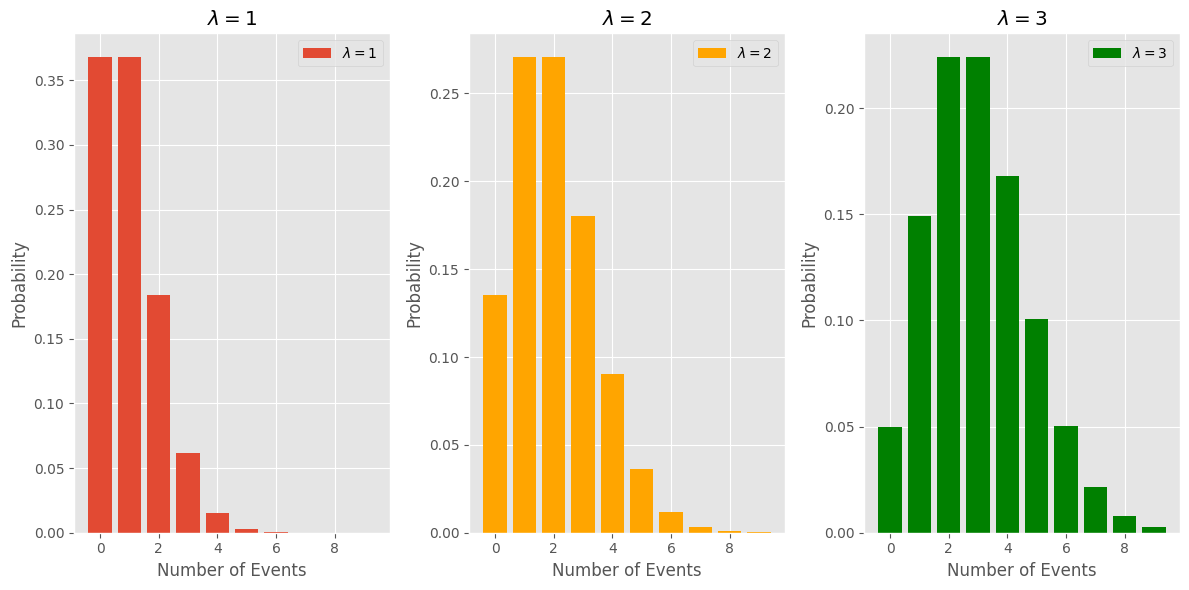

Average number of events for λ=1: 1.00
Average number of events for λ=2: 2.00
Average number of events for λ=3: 2.99
Probability of exactly 3 events for λ=5: 0.1404


In [19]:

from scipy.stats import poisson

# Define the range of x values (number of events)
x = np.arange(10)

# Calculate PMFs for different lambda values
f1 = poisson.pmf(x, mu=1)
f2 = poisson.pmf(x, mu=2)
f3 = poisson.pmf(x, mu=3)

# Plot PMFs
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.bar(x, f1, label="$\lambda=1$")
plt.title("$\lambda=1$")
plt.xlabel("Number of Events")
plt.ylabel("Probability")
plt.legend()

plt.subplot(1, 3, 2)
plt.bar(x, f2, label="$\lambda=2$", color='orange')
plt.title("$\lambda=2$")
plt.xlabel("Number of Events")
plt.ylabel("Probability")
plt.legend()

plt.subplot(1, 3, 3)
plt.bar(x, f3, label="$\lambda=3$", color='green')
plt.title("$\lambda=3$")
plt.xlabel("Number of Events")
plt.ylabel("Probability")
plt.legend()

plt.tight_layout()
plt.show()

# Calculate the average number of events
average_f1 = np.sum(x * f1)
average_f2 = np.sum(x * f2)
average_f3 = np.sum(x * f3)

print(f"Average number of events for λ=1: {average_f1:.2f}")
print(f"Average number of events for λ=2: {average_f2:.2f}")
print(f"Average number of events for λ=3: {average_f3:.2f}")

# Calculate PMF of 3 events for λ=5
pmf_3_events_lambda_5 = poisson.pmf(3, mu=5)
print(f"Probability of exactly 3 events for λ=5: {pmf_3_events_lambda_5:.4f}")


Central Limit Theorem

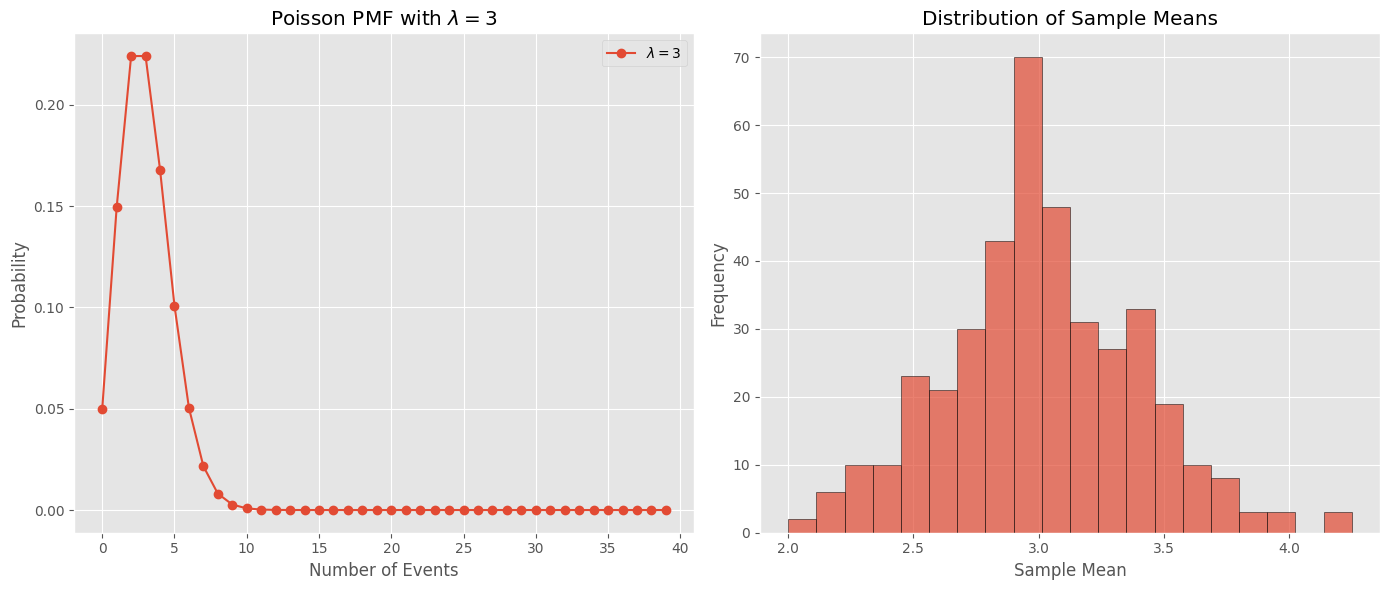

In [20]:

# Plot the Poisson PMF
bins = np.arange(0, 40)
p_pois = poisson.pmf(bins, mu=3)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(bins, p_pois, 'o-', label='$\lambda=3$')
plt.title('Poisson PMF with $\lambda=3$')
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()

# Define the function to sample from Poisson and compute the mean
def sample_pois(_):
    samples = poisson.rvs(mu=3, size=20)
    return np.mean(samples)

# Generate means from multiple samples
num_samples = 400
means = [sample_pois(_) for _ in range(num_samples)]

# Plot the histogram of the sample means
plt.subplot(1, 2, 2)
plt.hist(means, bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()


Using Normal Distribution in Weight Initialization

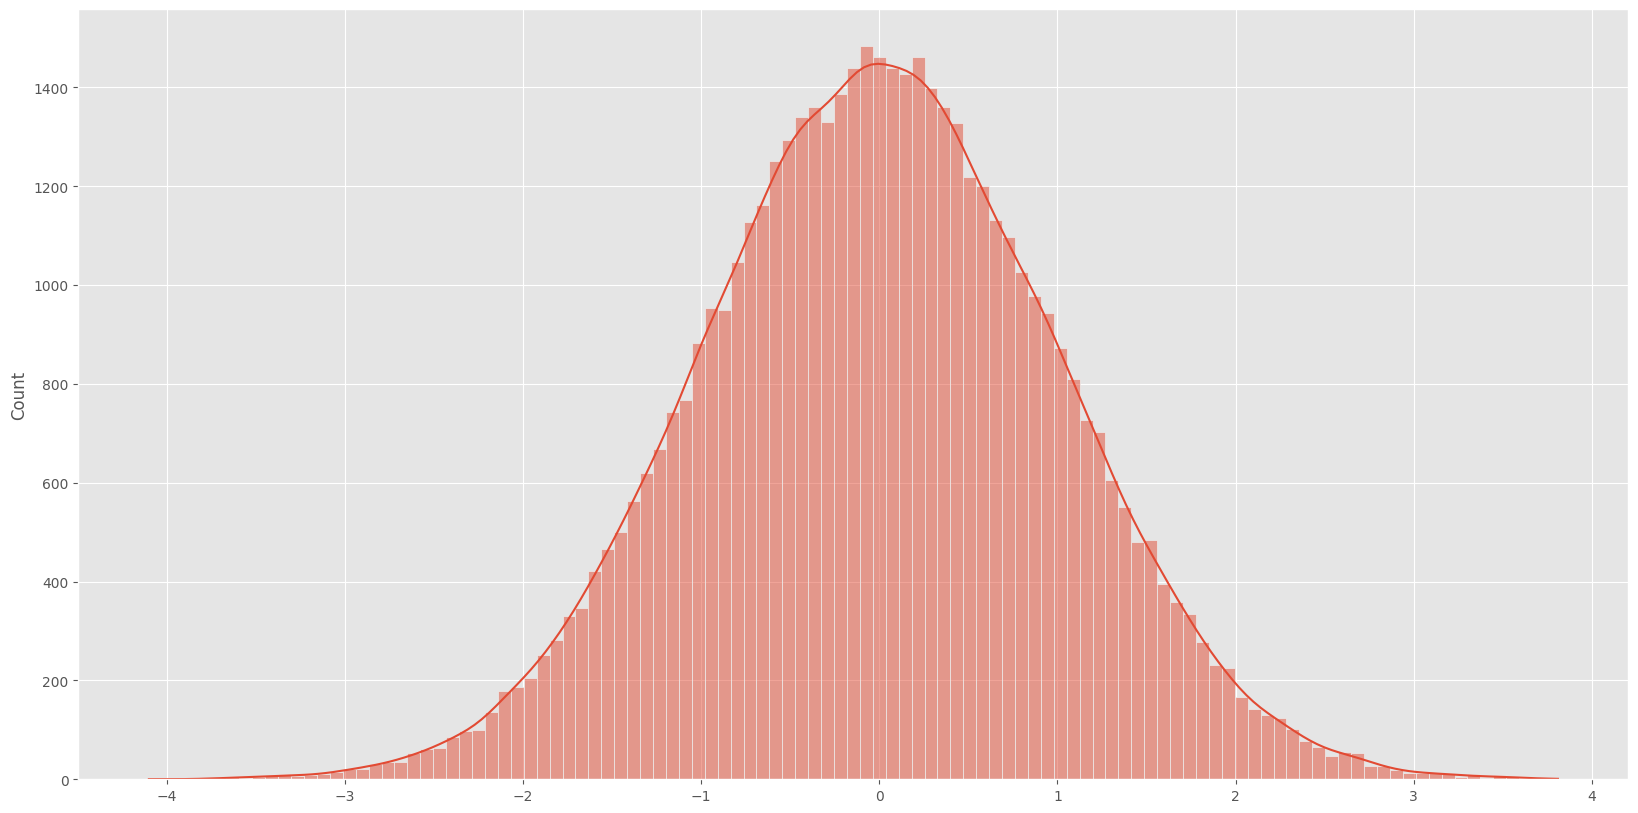

In [21]:
import seaborn as sns
plt.figure(figsize=(20, 10))
x = np.random.normal(size=(50000))
sns.histplot(x, kde=True)
plt.show()